# 2do intento de Examen 1 curso Machine Learning (MITIC-DS-A-Septiembre-2024) : «Diabetes Dataset» disponible en Kaggle.

# Outcome: Variable objetivo (1: diabetes, 0: no diabetes)

## **Configuración**

In [120]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils_profe
from collections import Counter
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency
from tabulate import tabulate
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
import scipy.stats as stats
path = '../../data/diabetes.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [119]:
#Tasa de falsos positivo es fpr, Tasa de Verdadeos positivos es tpr
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [2]:
def ver_diccionario(diccionario_file):
    # Carga del diccionario de datos desde el archivo CSV
    # Asegúrate de reemplazar 'diccionario.csv' por el nombre de tu archivo
    diccionario = pd.read_csv(f'../../data/{diccionario_file}')

    # Mostrar los datos tabulados con `tabulate`
    tabla = tabulate(diccionario, headers='keys', tablefmt='fancy_grid', showindex=False)

    # Imprimir la tabla
    print(tabla)

def ver_distro(df,columna,leyenda):
    # Calcular los parámetros de la distribución normal (media y desviación estándar)
    media = df[columna].mean()
    desviacion_estandar = df[columna].std()

    # Definir el rango de valores para la campana
    x = np.linspace(df[columna].min(), df[columna].max(), 100)

    # Generar la curva de la distribución normal
    y = stats.norm.pdf(x, media, desviacion_estandar)

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 4))

    # Histograma de la columna 'Glucose'
    df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax, density=True)

    # Añadir la campana de Gauss
    ax.plot(x, y, color='red', label='Distribución Normal')

    # Título y etiquetas
    ax.set_title(f"Distribución de {leyenda}", fontsize=14)
    ax.set_xlabel(leyenda, fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)

    # Añadir leyenda
    ax.legend()

    # Ajustar y mostrar el gráfico
    plt.tight_layout()
    plt.show()    

In [3]:
ver_diccionario('diccionario1.csv')

╒═════╤══════════════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna                  │ Tipo         │ Descripción                                                                                     │   Ejemplo │
╞═════╪══════════════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Pregnancies              │ Integer      │ Número de embarazos                                                                             │       nan │
├─────┼──────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────┤
│   2 │ Glucose                  │ Float        │ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. │       nan │
├─────┼──────────────────────────┼──────

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [4]:
df.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No hay nulos, tenemos datos en todas las columnas.

In [6]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [7]:
utils_profe.generar_diccionario(df)

data_dict = {
    'Pregnancies': 'int64',
    'Glucose': 'int64',
    'BloodPressure': 'int64',
    'SkinThickness': 'int64',
    'Insulin': 'int64',
    'BMI': 'float64',
    'DiabetesPedigreeFunction': 'float64',
    'Age': 'int64',
    'Outcome': 'int64',
}


Todos los datos ya son primitivas. No hay necesidad de convertir tipos de datos.

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [8]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


NO hay duplicados

### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [9]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

""


El unico categorico es la target. 

Variable objetivo (1: diabetes- 0: no diabetes).    

### **Manejo de valores faltantes:**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [10]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


Asegurar que no hay datos faltantes.

# NO HAY DATOS FALTANTES

### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [11]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils_profe.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Pregnancies,4.0,0.520833,0.000,13.000
Glucose,5.0,0.651042,44.000,199.000
BloodPressure,45.0,5.859375,38.000,106.000
SkinThickness,1.0,0.130208,0.000,63.000
Insulin,34.0,4.427083,0.000,318.000
BMI,19.0,2.473958,18.200,50.000
DiabetesPedigreeFunction,29.0,3.776042,0.078,1.191
Age,9.0,1.171875,21.000,66.000
Outcome,0.0,0.000000,0.000,1.000


In [12]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
ver_diccionario('diccionario1.csv')

╒═════╤══════════════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna                  │ Tipo         │ Descripción                                                                                     │   Ejemplo │
╞═════╪══════════════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Pregnancies              │ Integer      │ Número de embarazos                                                                             │       nan │
├─────┼──────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────┤
│   2 │ Glucose                  │ Float        │ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. │       nan │
├─────┼──────────────────────────┼──────

<a id='sec_3'></a>
## `2. Exploración de datos`

El objetivo de esta fase es poder familiarizarnos con la información contenida mediante visualizaciones univariadas y multivariadas, de la misma forma un analisis descriptivo.

1. Visualizaciones univariadas
2. Visualizaciones multivariadas.
3. Estadísticas descriptivas.

*Gráfico Embarazos*

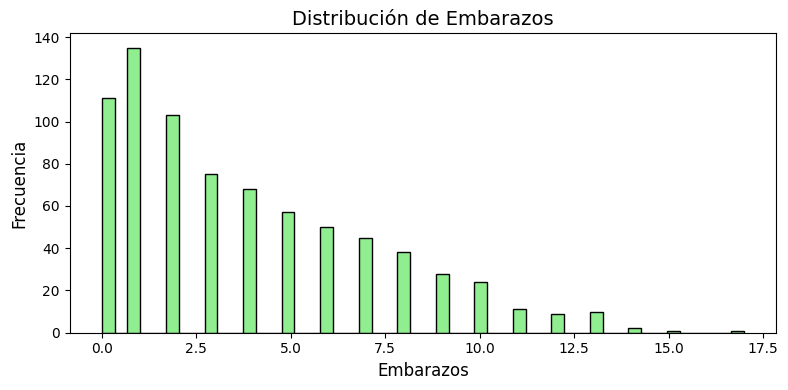

In [14]:
leyenda = "Embarazos"
columna = 'Pregnancies'
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Se observa que la mayoria de las mujeres tienen 0-3 embarazos.

Hay 4 casos extremos de embarazos que superan los 13

In [15]:
# Filtrar los registros outliers
filtered_df = df[df[columna] > 13]
# Mostrar los primeros resultados
print(filtered_df.T)

                              88       159      298      455
Pregnancies                15.000   17.000   14.000   14.000
Glucose                   136.000  163.000  100.000  175.000
BloodPressure              70.000   72.000   78.000   62.000
SkinThickness              32.000   41.000   25.000   30.000
Insulin                   110.000  114.000  184.000    0.000
BMI                        37.100   40.900   36.600   33.600
DiabetesPedigreeFunction    0.153    0.817    0.412    0.212
Age                        43.000   47.000   46.000   38.000
Outcome                     1.000    1.000    1.000    1.000


*Gráfico Edades*

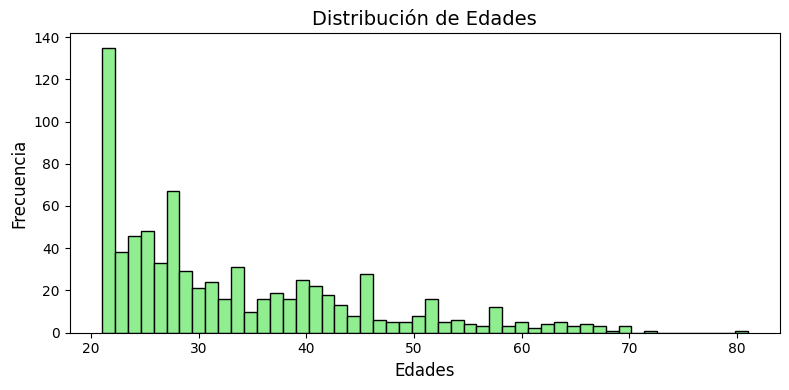

In [16]:
leyenda = "Edades"
columna = 'Age'
iq = 66
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Hay una alta población joven.

Hay 9 personas que pasan  los 66 años.

In [17]:
# Filtrar los registros outliers
filtered_df = df[df[columna] > iq]
# Mostrar los primeros resultados
print(filtered_df.T)

                              123     363      453     459      489     537  \
Pregnancies                 5.000    4.00    2.000    9.00    8.000   0.000   
Glucose                   132.000  146.00  119.000  134.00  194.000  57.000   
BloodPressure              80.000   78.00    0.000   74.00   80.000  60.000   
SkinThickness               0.000    0.00    0.000   33.00    0.000   0.000   
Insulin                     0.000    0.00    0.000   60.00    0.000   0.000   
BMI                        26.800   38.50   19.600   25.90   26.100  21.700   
DiabetesPedigreeFunction    0.186    0.52    0.832    0.46    0.551   0.735   
Age                        69.000   67.00   72.000   81.00   67.000  67.000   
Outcome                     0.000    1.00    0.000    0.00    0.000   0.000   

                              666     674     684  
Pregnancies                 4.000   8.000    5.00  
Glucose                   145.000  91.000  136.00  
BloodPressure              82.000  82.000   82.00  
S

*Gráfico Glucosa*

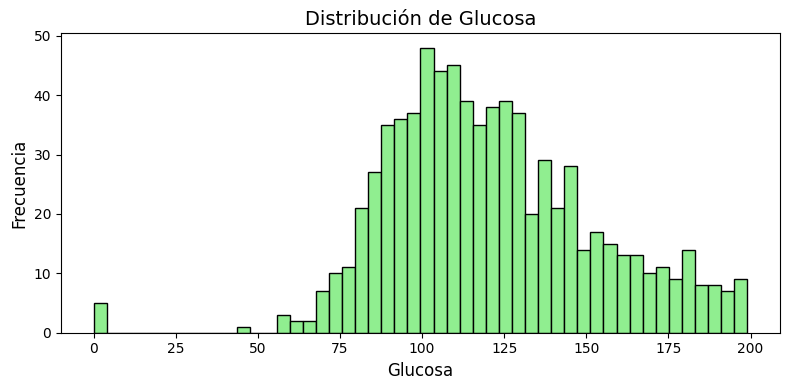

In [18]:
leyenda = "Glucosa"
columna = 'Glucose'
iq = 44
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Se observa que la mayoria de las mujeres tienen 75-125 de glucosa.

Hay 5 casos extremos de glucsa que NO PUEDEN SER CERO.

Si pudiera consultaría esos datos, pero son pocos y como son datos de salud prefiero eliminarlos. 
No aplicaría imputación de ningún tipo.

Pero como lo pide taxativamente, a efectos academicos lo voy a hacer.

In [19]:
# Filtrar los registros outliers
filtered_df = df[df[columna] < iq]
# Mostrar los primeros resultados
print(filtered_df.T)

                            75      182     342     349     502
Pregnancies                1.00   1.000   1.000   5.000   6.000
Glucose                    0.00   0.000   0.000   0.000   0.000
BloodPressure             48.00  74.000  68.000  80.000  68.000
SkinThickness             20.00  20.000  35.000  32.000  41.000
Insulin                    0.00  23.000   0.000   0.000   0.000
BMI                       24.70  27.700  32.000  41.000  39.000
DiabetesPedigreeFunction   0.14   0.299   0.389   0.346   0.727
Age                       22.00  21.000  22.000  37.000  41.000
Outcome                    0.00   0.000   0.000   1.000   1.000


In [20]:
# Reemplazar los ceros en 'Glucose' por la media calculada
df['Glucose'] = df['Glucose'].replace(0, 120.894531)

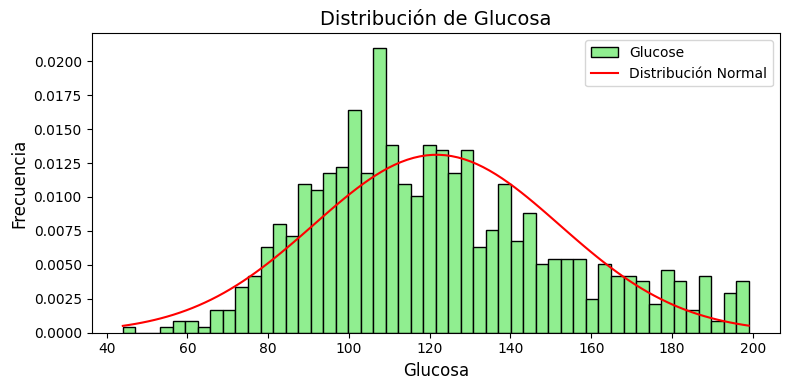

In [21]:
# Calcular los parámetros de la distribución normal (media y desviación estándar)
media = df[columna].mean()
desviacion_estandar = df[columna].std()

# Definir el rango de valores para la campana
x = np.linspace(df[columna].min(), df[columna].max(), 100)

# Generar la curva de la distribución normal
y = stats.norm.pdf(x, media, desviacion_estandar)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Histograma de la columna 'Glucose'
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax, density=True)

# Añadir la campana de Gauss
ax.plot(x, y, color='red', label='Distribución Normal')

# Título y etiquetas
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)

# Añadir leyenda
ax.legend()

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()

Quedo con una distro normal.

*Gráfico Presión Sanguínea*

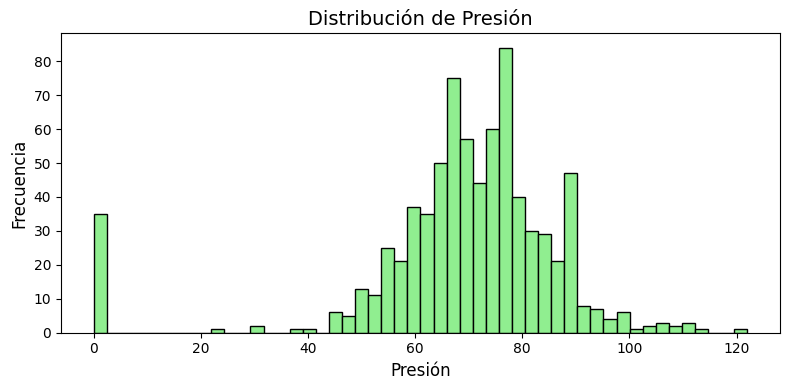

In [22]:
leyenda = "Presión"
columna = 'BloodPressure'
lower_bound = 38
upper_bound = 106
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Hay 45 casos extremos de presión arterial.

Vamos a aplicar la media a los que tienen CERO.

In [23]:
# Filtrar los datos para quedarse solo con los valores fuera de los límites
outliers_df = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

# Mostrar los primeros registros del DataFrame con valores fuera de los límites
print(outliers_df.T)

                              7        15       18       43       49      60   \
Pregnancies                10.000    7.000    1.000    9.000    7.000   2.000   
Glucose                   115.000  100.000  103.000  171.000  105.000  84.000   
BloodPressure               0.000    0.000   30.000  110.000    0.000   0.000   
SkinThickness               0.000    0.000   38.000   24.000    0.000   0.000   
Insulin                     0.000    0.000   83.000  240.000    0.000   0.000   
BMI                        35.300   30.000   43.300   45.400    0.000   0.000   
DiabetesPedigreeFunction    0.134    0.484    0.183    0.721    0.305   0.304   
Age                        29.000   32.000   33.000   54.000   24.000  21.000   
Outcome                     0.000    1.000    0.000    1.000    0.000   0.000   

                             78      81       84       106  ...     589  \
Pregnancies                 0.00   2.000    5.000    1.000  ...   0.000   
Glucose                   131.00  74.00

In [24]:
# Reemplazar los ceros en 'Presion arterial' por la media calculada
df[columna] = df[columna].replace(0, 69.10)

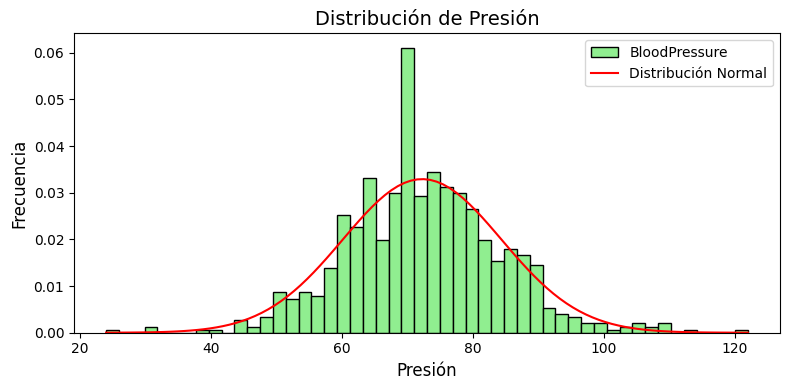

In [25]:
# Calcular los parámetros de la distribución normal (media y desviación estándar)
media = df[columna].mean()
desviacion_estandar = df[columna].std()

# Definir el rango de valores para la campana
x = np.linspace(df[columna].min(), df[columna].max(), 100)

# Generar la curva de la distribución normal
y = stats.norm.pdf(x, media, desviacion_estandar)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Histograma de la columna 'Glucose'
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax, density=True)

# Añadir la campana de Gauss
ax.plot(x, y, color='red', label='Distribución Normal')

# Título y etiquetas
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)

# Añadir leyenda
ax.legend()

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()

In [26]:
df[columna].describe()

count    768.000000
mean      72.254557
std       12.115997
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Los que tienen 24 de presión o es error de digitación o es real. No tengo forma de saber, así que dejo sin imputación.

In [27]:
ver_diccionario('diccionario1.csv')

╒═════╤══════════════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna                  │ Tipo         │ Descripción                                                                                     │   Ejemplo │
╞═════╪══════════════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Pregnancies              │ Integer      │ Número de embarazos                                                                             │       nan │
├─────┼──────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────┤
│   2 │ Glucose                  │ Float        │ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. │       nan │
├─────┼──────────────────────────┼──────

*Gráfico SkinThickness*


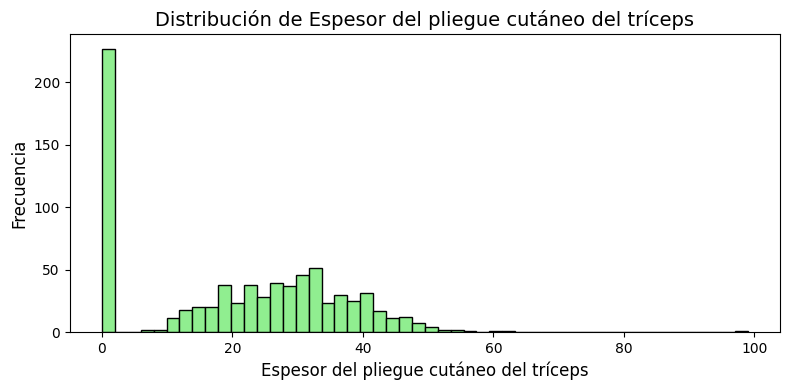

In [28]:
leyenda = "Espesor del pliegue cutáneo del tríceps"
columna = 'SkinThickness'
lower_bound = 0
upper_bound = 63
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Es un error de carga.

Si solo veo los que tienen cargado el dato parace una distro normal.

Voy a imputar por la media.

In [29]:
columna

'SkinThickness'

El SkinThickness mide grasa, voy a guiarme por la media del BMI de cada parte del intercuartilico pero solo de la BMI

In [30]:
# 1. Calcular el rango intercuartílico (IQR) de BMI para todos los registros
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definir los rangos de BMI basados en el IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Dividir los registros en tres grupos según el rango de BMI (menor, en rango, mayor)
df['BMI_range'] = pd.cut(df['BMI'], bins=[-float('inf'), lower_bound, upper_bound, float('inf')], labels=['Below Q1', 'Interquartile Range', 'Above Q3'])

# 4. Calcular la media de SkinThickness por cada rango de BMI, considerando solo valores de SkinThickness > 0
mean_skinthickness_by_bmi_range = df[df['SkinThickness'] > 0].groupby('BMI_range')['SkinThickness'].mean()

# 5. Aplicar la media correspondiente a los valores de SkinThickness == 0
def apply_mean_based_on_bmi_range(row):
    if row['SkinThickness'] == 0:
        bmi_range = row['BMI_range']
        return mean_skinthickness_by_bmi_range.get(bmi_range, 0)
    else:
        return row['SkinThickness']

# 6. Corregir directamente la columna 'SkinThickness' aplicando la media
df['SkinThickness'] = df.apply(apply_mean_based_on_bmi_range, axis=1)

# Mostrar los primeros registros para ver el cambio
print(df[['BMI', 'SkinThickness']].head())

    BMI  SkinThickness
0  33.6      35.000000
1  26.6      29.000000
2  23.3      28.988743
3  28.1      23.000000
4  43.1      35.000000


C:\Users\edgar\AppData\Local\Temp\ipykernel_20088\1141895524.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_skinthickness_by_bmi_range = df[df['SkinThickness'] > 0].groupby('BMI_range')['SkinThickness'].mean()


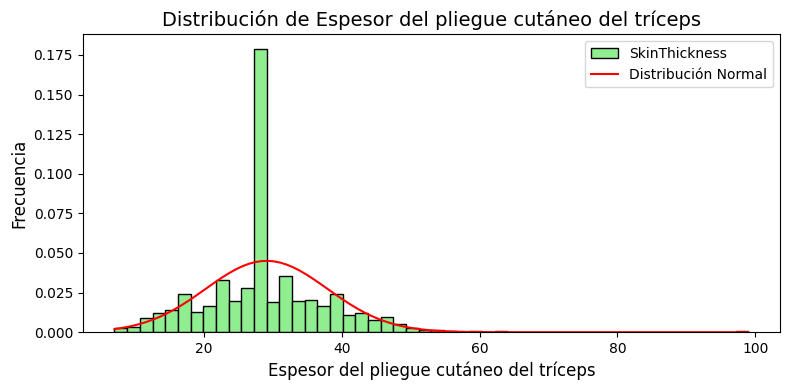

In [31]:
ver_distro(df,columna,leyenda)

La verdad que me asusta esto, si pudiera tener mas tiempo vería de como gestionar mejor esta imputación.

Sinceramente, no sé, voy a anotar esto para ver en clases o con el ayudante.

In [32]:
ver_diccionario('diccionario1.csv')

╒═════╤══════════════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna                  │ Tipo         │ Descripción                                                                                     │   Ejemplo │
╞═════╪══════════════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Pregnancies              │ Integer      │ Número de embarazos                                                                             │       nan │
├─────┼──────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────┤
│   2 │ Glucose                  │ Float        │ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. │       nan │
├─────┼──────────────────────────┼──────

*Gráfico Insulina*

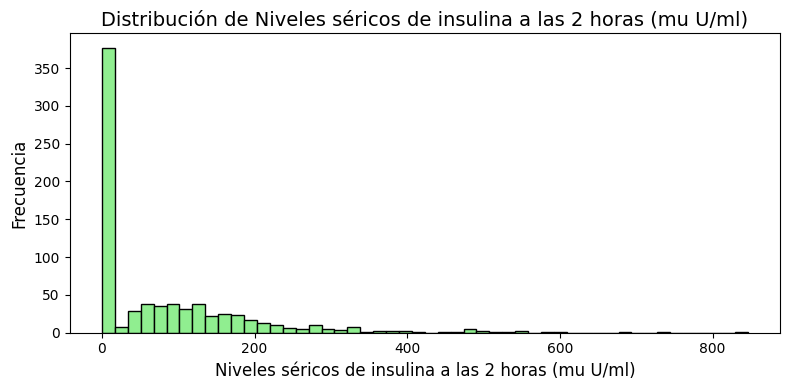

In [33]:
leyenda = "Niveles séricos de insulina a las 2 horas (mu U/ml)"
columna = 'Insulin'
lower_bound = 0
upper_bound = 318
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

El cero es posible, para Diabeticos. NO es un error.

Hay 34 outliers. 

NO VEO ERRORES.



In [34]:
# Filtrar los datos para quedarse solo con los valores fuera de los límites
outliers_df = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

# Mostrar los primeros registros del DataFrame con valores fuera de los límites
print(outliers_df.T)

                                          8                    13   \
Pregnancies                                 2                    1   
Glucose                                 197.0                189.0   
BloodPressure                            70.0                 60.0   
SkinThickness                            45.0                 23.0   
Insulin                                   543                  846   
BMI                                      30.5                 30.1   
DiabetesPedigreeFunction                0.158                0.398   
Age                                        53                   59   
Outcome                                     1                    1   
BMI_range                 Interquartile Range  Interquartile Range   

                                          54                   111  \
Pregnancies                                 7                    8   
Glucose                                 150.0                155.0   
BloodPressure      

In [35]:
ver_diccionario('diccionario1.csv')

╒═════╤══════════════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna                  │ Tipo         │ Descripción                                                                                     │   Ejemplo │
╞═════╪══════════════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Pregnancies              │ Integer      │ Número de embarazos                                                                             │       nan │
├─────┼──────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────┤
│   2 │ Glucose                  │ Float        │ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. │       nan │
├─────┼──────────────────────────┼──────

*Gráfico BMI*

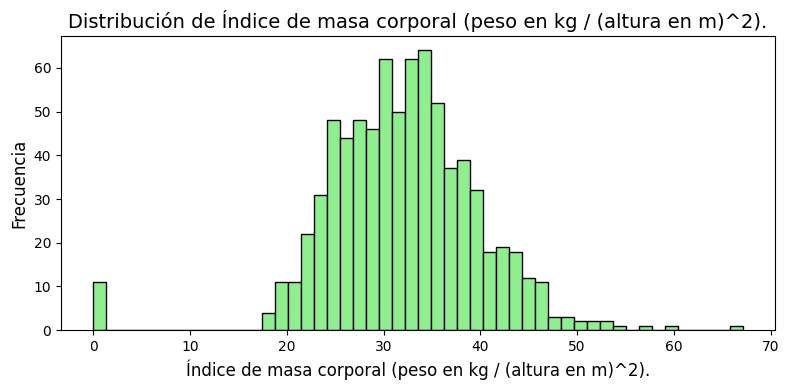

In [36]:
leyenda = "Índice de masa corporal (peso en kg / (altura en m)^2)."
columna = 'BMI'
lower_bound = 18.2
upper_bound = 50
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Hay 19 casos extremos de Índice de masa corporal (peso en kg / (altura en m)^2) 

Los que son cero, voy a imputar por la media.

In [37]:
# Filtrar los datos para quedarse solo con los valores fuera de los límites
outliers_df = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

# Mostrar los primeros registros del DataFrame con valores fuera de los límites
print(outliers_df.T)

                               9         49        60        81        120  \
Pregnancies                      8         7         2         2         0   
Glucose                      125.0     105.0      84.0      74.0     162.0   
BloodPressure                 96.0      69.1      69.1      69.1      76.0   
SkinThickness                 23.0      23.0      23.0      23.0      56.0   
Insulin                          0         0         0         0       100   
BMI                            0.0       0.0       0.0       0.0      53.2   
DiabetesPedigreeFunction     0.232     0.305     0.304     0.102     0.759   
Age                             54        24        21        22        25   
Outcome                          1         0         0         0         1   
BMI_range                 Below Q1  Below Q1  Below Q1  Below Q1  Above Q3   

                               125       145       177        193       247  \
Pregnancies                      1         0         0        

In [38]:
# Reemplazar los ceros por la media calculada
df[columna] = df[columna].replace(0, 32)

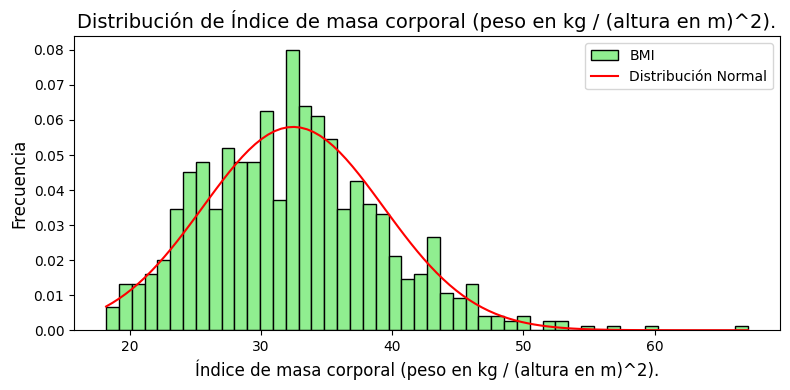

In [39]:
ver_distro(df,columna,leyenda)

*Gráfico DiabetesPedigreeFunction*

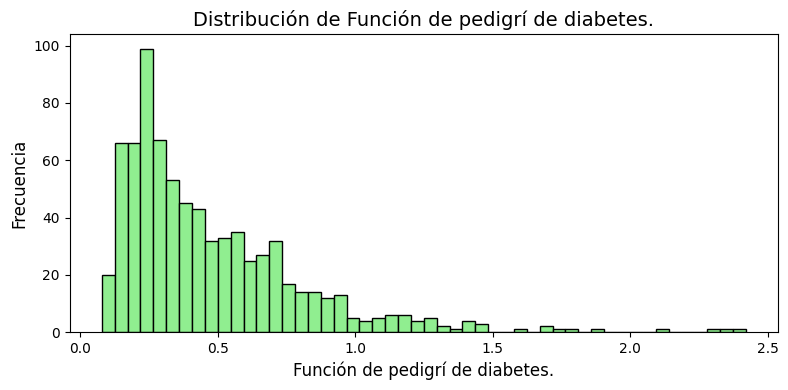

In [40]:
leyenda = "Función de pedigrí de diabetes."
columna = 'DiabetesPedigreeFunction'
lower_bound = 0.078
upper_bound = 1.191
fig, ax = plt.subplots(figsize=(8, 4))
df[columna].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title(f"Distribución de {leyenda}", fontsize=14)
ax.set_xlabel(leyenda, fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

Veo personas con MUY fuerte historial de diabtes.

Son 29 outliers

In [41]:
# Filtrar los datos para quedarse solo con los valores fuera de los límites
outliers_df = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

# Mostrar los primeros registros del DataFrame con valores fuera de los límites
print(outliers_df.T)

                                          4                    12   \
Pregnancies                                 0                   10   
Glucose                                 137.0                139.0   
BloodPressure                            40.0                 80.0   
SkinThickness                            35.0            28.988743   
Insulin                                   168                    0   
BMI                                      43.1                 27.1   
DiabetesPedigreeFunction                2.288                1.441   
Age                                        33                   57   
Outcome                                     1                    0   
BMI_range                 Interquartile Range  Interquartile Range   

                                          39                   45   \
Pregnancies                                 4                    0   
Glucose                                 111.0                180.0   
BloodPressure      

**2. Visualizaciones multivariadas**

*Gráfico Promedio nivel de glucosa por Edad*

In [42]:
ver_diccionario('diccionario1.csv')

╒═════╤══════════════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════╕
│   # │ Columna                  │ Tipo         │ Descripción                                                                                     │   Ejemplo │
╞═════╪══════════════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════╡
│   1 │ Pregnancies              │ Integer      │ Número de embarazos                                                                             │       nan │
├─────┼──────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┼───────────┤
│   2 │ Glucose                  │ Float        │ Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa. │       nan │
├─────┼──────────────────────────┼──────

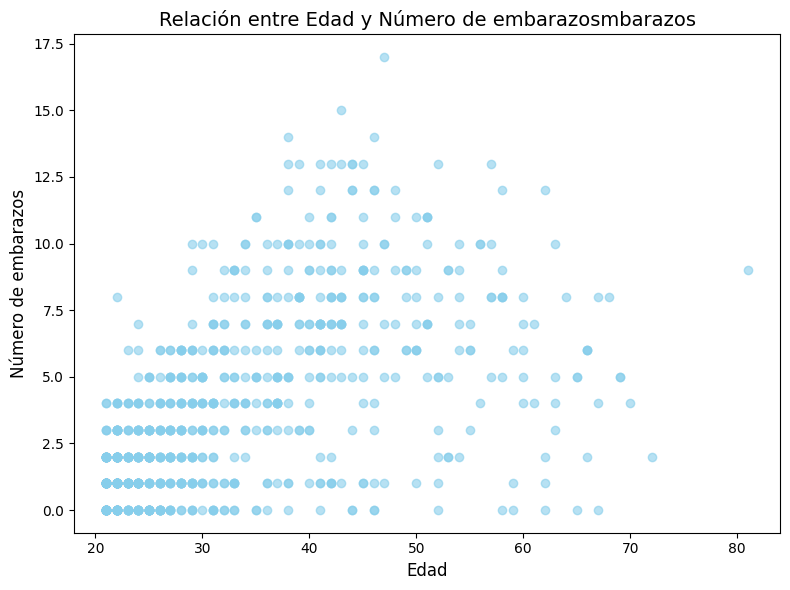

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Age'], df['Pregnancies'], color='skyblue', alpha=0.6)
ax.set_title("Relación entre Edad y Número de embarazosmbarazos", fontsize=14)
ax.set_xlabel("Edad", fontsize=12)
ax.set_ylabel("Número de embarazos", fontsize=12)
plt.tight_layout()
plt.show()

Hay mujeres que no tuvieron embarazos en toda su vida.

Hay mueres que practicamente tuviern 1 embarazo cada año de su vida, desde los 21 a los 38 aproximadamente.

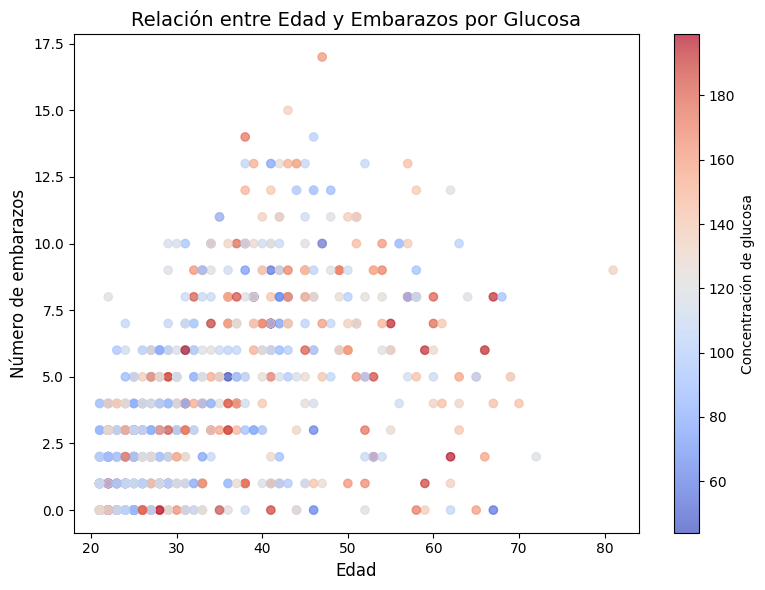

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df['Age'], df['Pregnancies'], c=df['Glucose'], cmap='coolwarm', alpha=0.7)
ax.set_title("Relación entre Edad y Embarazos por Glucosa", fontsize=14)
ax.set_xlabel("Edad", fontsize=12)
ax.set_ylabel("Número de embarazos", fontsize=12)
plt.colorbar(scatter, label="Concentración de glucosa")
plt.tight_layout()
plt.show()

Aparentemente, el nivel de embarazo influye en los niveles de glucosa de la sangre por encima de la edad.

Mas de 8 embarazos dispara por encima de los 120. Ya está cerca de ser Diabetes.

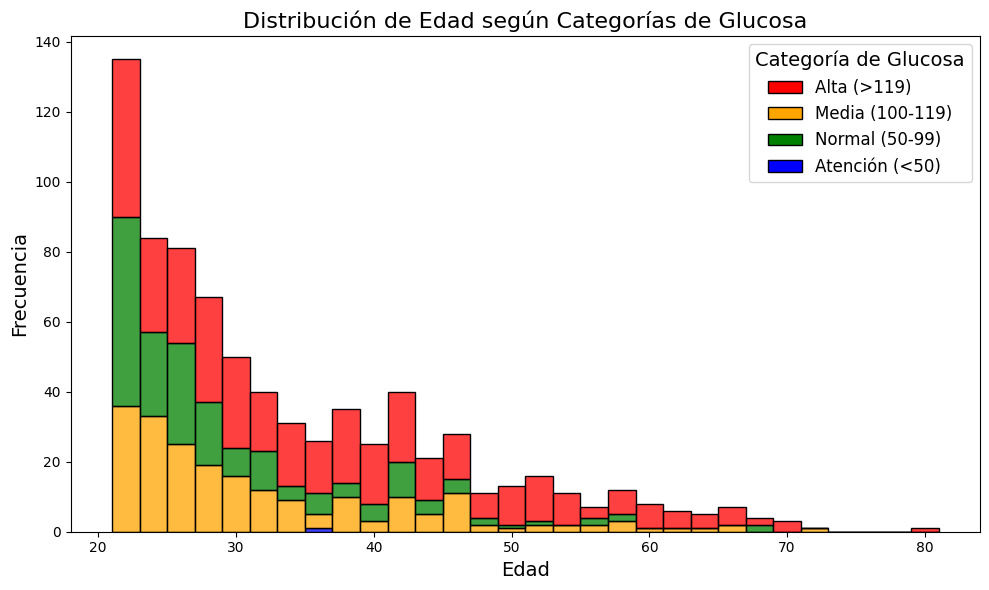

In [45]:
# Crear categorías basadas en los rangos de glucosa
def categorizar_glucosa(glucose):
    if glucose > 119:
        return 'Alta'
    elif 100 <= glucose <= 119:
        return 'Media'
    elif 50 <= glucose <= 99:
        return 'Normal'
    else:
        return 'Atención'

# Aplicar la función al DataFrame
df['Glucosa_Categoría'] = df['Glucose'].apply(categorizar_glucosa)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x='Age', 
    hue='Glucosa_Categoría', 
    multiple='stack', 
    palette={'Alta': 'red', 'Media': 'orange', 'Normal': 'green', 'Atención': 'blue'},
    edgecolor='black',
    bins=30
)

# Leyenda personalizada
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Alta (>119)'),
    Patch(facecolor='orange', edgecolor='black', label='Media (100-119)'),
    Patch(facecolor='green', edgecolor='black', label='Normal (50-99)'),
    Patch(facecolor='blue', edgecolor='black', label='Atención (<50)')
]

plt.legend(handles=legend_elements, title="Categoría de Glucosa", fontsize=12, title_fontsize=14)

# Etiquetas y título
plt.title('Distribución de Edad según Categorías de Glucosa', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.show()


En todas las edades hay Glucosa Alta.

Hay mujeres que no tuvieron embarazos pero ahora tienen glucosa alta.

In [46]:
# Filtrar mujeres sin embarazos y con glucosa mayor a 119
filtered_df = df[(df['Pregnancies'] == 0) & (df['Glucose'] > 119)]

# Mostrar los resultados
print(filtered_df.T)


                                          4                    45   \
Pregnancies                                 0                    0   
Glucose                                 137.0                180.0   
BloodPressure                            40.0                 66.0   
SkinThickness                            35.0                 39.0   
Insulin                                   168                    0   
BMI                                      43.1                 42.0   
DiabetesPedigreeFunction                2.288                1.893   
Age                                        33                   25   
Outcome                                     1                    1   
BMI_range                 Interquartile Range  Interquartile Range   
Glucosa_Categoría                        Alta                 Alta   

                                          58                   78   \
Pregnancies                                 0                    0   
Glucose            

Veo que el registro 58 tiene glucosa alta, pero no tiene diabetes.

Esto amerita una revisión con los dueños de los datos.

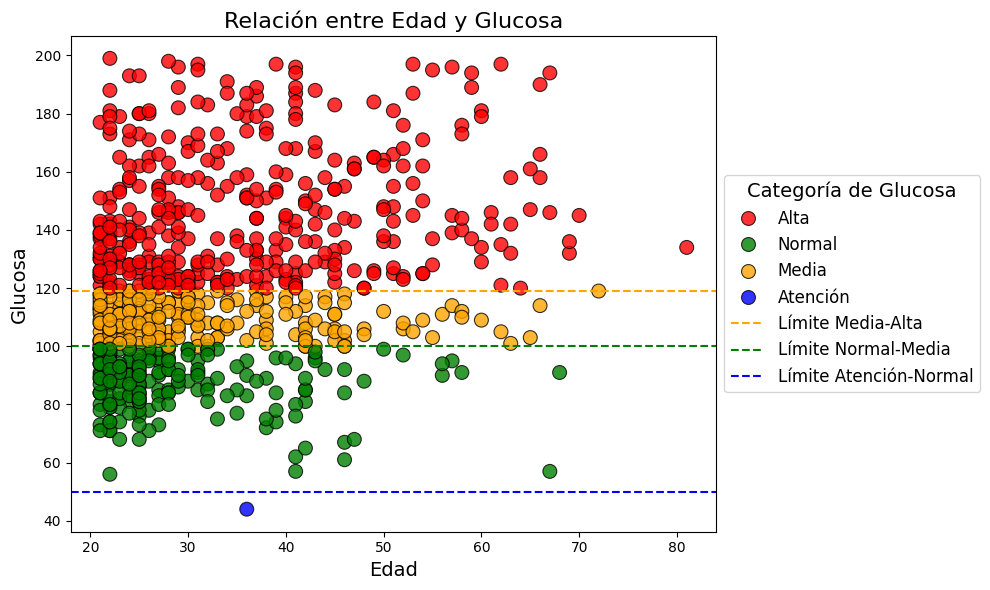

In [47]:
# Configurar colores para las categorías
palette = {
    'Alta': 'red',
    'Media': 'orange',
    'Normal': 'green',
    'Atención': 'blue'
}

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Glucose',
    hue='Glucosa_Categoría',
    palette=palette,
    alpha=0.8,
    edgecolor='black',
    s=100  # Tamaño de los puntos
)

# Etiquetas y título
plt.title('Relación entre Edad y Glucosa', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Glucosa', fontsize=14)

# Agregar una línea horizontal para visualizar límites de glucosa
plt.axhline(119, color='orange', linestyle='--', label='Límite Media-Alta')
plt.axhline(100, color='green', linestyle='--', label='Límite Normal-Media')
plt.axhline(50, color='blue', linestyle='--', label='Límite Atención-Normal')

# Mover la leyenda a la derecha
plt.legend(
    title="Categoría de Glucosa",
    fontsize=12,
    title_fontsize=14,
    loc='center left',  # Posición en el eje horizontal
    bbox_to_anchor=(1, 0.5)  # Ajuste hacia la derecha
)

plt.tight_layout()
plt.show()


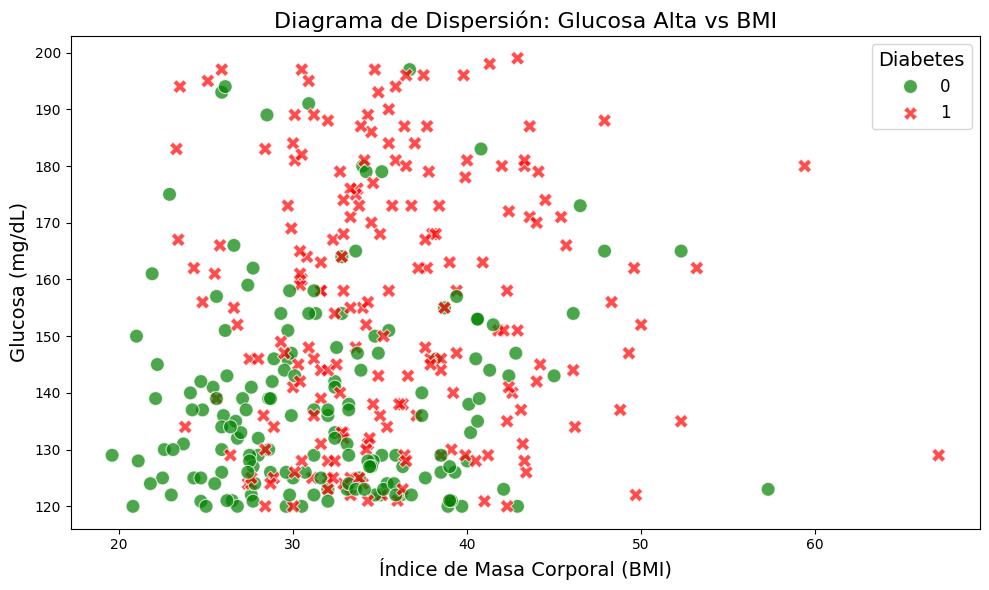

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar registros de glucosa alta
filtered_df = df[df['Glucose'] > 119]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='BMI',
    y='Glucose',
    hue='Outcome',  # Outcome es la columna que indica si tiene diabetes (0 o 1)
    palette={0: 'green', 1: 'red'},  # Verde para 0 (No diabetes), rojo para 1 (Diabetes)
    style='Outcome',  # Estilo de marcador para diferenciar los valores de Outcome
    markers=['o', 'X'],  # O para No diabetes, X para Diabetes
    s=100,  # Tamaño de los puntos
    alpha=0.7  # Transparencia de los puntos
)

# Título y etiquetas
plt.title('Diagrama de Dispersión: Glucosa Alta vs BMI', fontsize=16)
plt.xlabel('Índice de Masa Corporal (BMI)', fontsize=14)
plt.ylabel('Glucosa (mg/dL)', fontsize=14)

# Agregar leyenda y ajustar la visualización
plt.legend(title="Diabetes", fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


**2 Estadísticas descriptivas**

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254557,12.115997,24.000,64.00000,72.000000,80.00000,122.00
SkinThickness,768.0,29.078431,8.857338,7.000,24.00000,28.988743,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.500000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


Despues de aplicar todos los cambios al dataset veo una distro cuasi normal debido a algunos outliers.

Lo que me ha llamado la atención son mujeres con niveles altos de glucosa, BMI, SkinThickness y DiabetesPedigreeFunction SIN DIABETES.



<Axes: >

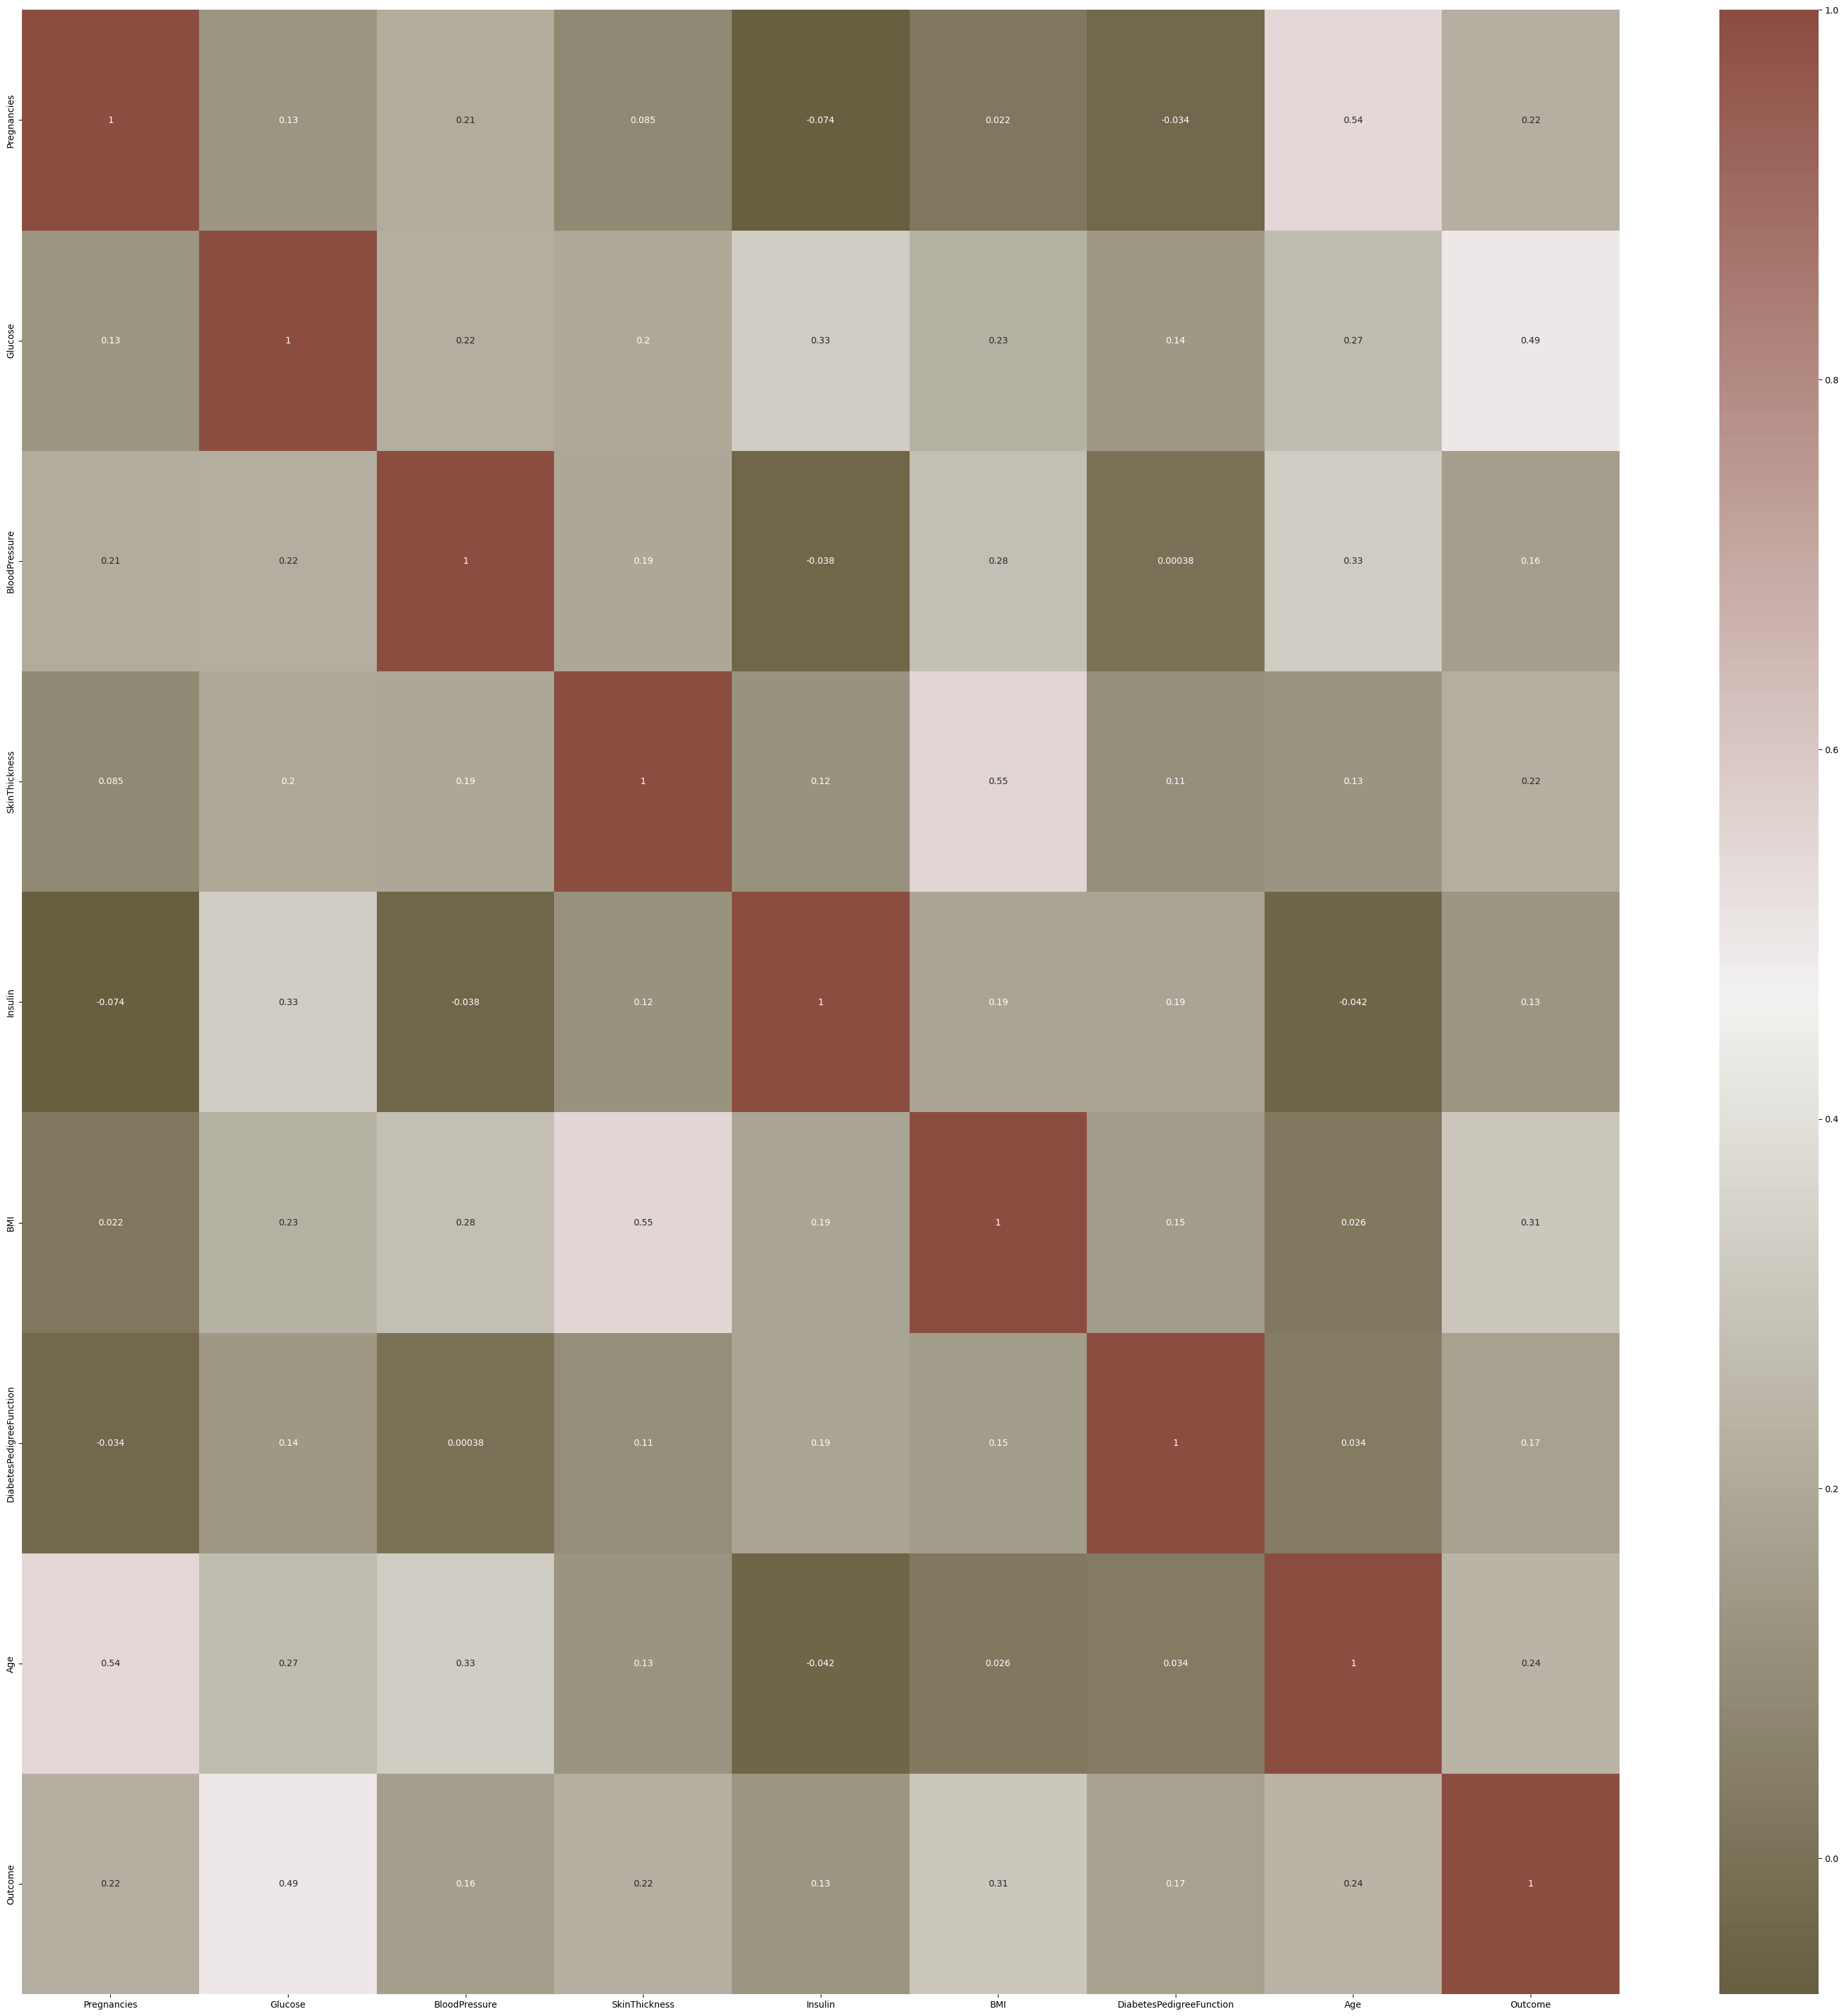

In [50]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.select_dtypes(include = 'number').corr()
f, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [51]:
df.select_dtypes(include = 'number').corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162981
SkinThickness               0.222116
Insulin                     0.130548
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Wow los embarazos tienen una relación debil?

También el nivel de insulina.

El BMI esperaba que tuviera más relacionado.

Pero el que me sorprende es el de insulina, es el menos relacionado.

<a id='sec_4'></a>
## `3. Implementación de Modelos`

1. Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost
2. Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
3. Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**3.1. Variables dummy y Pipeline**
La estructura solo debe tener primitivas y numéricas.

Voy a hacer una copia y luego eliminar las columnas agregadas BMI_range y Glucosa_Categoría.

In [52]:
df_copia = df.copy()

In [53]:
y = df_copia['Outcome']
print(y.unique())

[1 0]


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   BMI_range                 768 non-null    category
 10  Glucosa_Categoría         768 non-null    object  
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 61.0+ KB


In [55]:
# Eliminar las columnas 'BMI_range', 'Glucosa_Categoría'
df = df.drop(['BMI_range', 'Glucosa_Categoría'], axis=1)

# Verificar que las columnas han sido eliminadas
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0      35.000000        0  33.6   
1            1     85.0           66.0      29.000000        0  26.6   
2            8    183.0           64.0      28.988743        0  23.3   
3            1     89.0           66.0      23.000000       94  28.1   
4            0    137.0           40.0      35.000000      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [56]:
cat_columnas_nominal = []
#df.select_dtypes(exclude = 'object').columns.to_list()
columns_numericas = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

*Pipeline*

In [57]:
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [62]:
df_tratado = df.copy()

In [63]:
# Transformadores nominal
one_hot_encoder = OneHotEncoder()

#ordinal_encoder = OrdinalEncoder()

standard_scaler = StandardScaler()

imputer_categoricas = SimpleImputer(strategy='most_frequent')

imputer_num = SimpleImputer(strategy='mean')

In [64]:
col_transformer = make_column_transformer(
    (make_pipeline(imputer_categoricas, one_hot_encoder), cat_columnas_nominal),
    (make_pipeline(imputer_num, standard_scaler), columns_numericas),
    remainder='passthrough'
)

In [65]:
col_transformer.fit(df_tratado)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 []),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pregnancies', 'Glucose', 'BloodPressure',
                                  'SkinThickness', 'Insulin', 'BMI',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [66]:
aux = col_transformer.transform(df_tratado)
df_procesado = pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   pipeline-2__Pregnancies               768 non-null    float64
 1   pipeline-2__Glucose                   768 non-null    float64
 2   pipeline-2__BloodPressure             768 non-null    float64
 3   pipeline-2__SkinThickness             768 non-null    float64
 4   pipeline-2__Insulin                   768 non-null    float64
 5   pipeline-2__BMI                       768 non-null    float64
 6   pipeline-2__DiabetesPedigreeFunction  768 non-null    float64
 7   pipeline-2__Age                       768 non-null    float64
 8   remainder__Outcome                    768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [67]:
df_procesado.columns = df_procesado.columns.str.split('__').str[-1]
df_procesado.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [68]:
df_procesado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865276,-0.021024,0.668985,-0.692891,0.167240,0.468492,1.425995,1.0
1,-0.844885,-1.205989,-0.516560,-0.008861,-0.692891,-0.851551,-0.365061,-0.190672,0.0
2,1.233880,2.015979,-0.681738,-0.010132,-0.692891,-1.331838,0.604397,-0.105584,1.0
3,-0.844885,-1.074480,-0.516560,-0.686707,0.123302,-0.633239,-0.920763,-1.041549,0.0
4,-1.141852,0.503626,-2.663881,0.668985,0.765836,1.549885,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309333,2.137651,0.870031,0.065361,-0.908682,2.532136,0.0
764,-0.547919,0.010468,-0.186202,-0.234809,-0.692891,0.632973,-0.398282,-0.531023,0.0
765,0.342981,-0.022409,-0.021024,-0.686707,0.279594,-0.909768,-0.685193,-0.275760,0.0
766,-0.844885,0.141977,-1.012095,-0.010132,-0.692891,-0.342155,-0.371101,1.170732,1.0


**`3.2. División de Muestra Train y Test`**

El objetivo de esta fase es poder divir en dos partes: el conjunto de entrenamiento (train) y el conjunto de prueba (test). Estas divisiones se utilizan para entrenar y evaluar los modelos.

- `|Train:|` El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático. Es aquí donde el modelo "aprende" los patrones y relaciones en los datos para poder hacer predicciones o clasificaciones.

- `|Test:|` El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Es una medida objetiva de la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.

In [69]:
X = df_procesado.drop(columns=['Outcome'])
y = df_procesado['Outcome']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)

In [71]:
print(f"Tamaño del total de datos: {len(df_procesado)}")
print(f"Tamaño de train: {len(X_train)}")
print(f"Tamaño de test: {len(X_test)}")

Tamaño del total de datos: 768
Tamaño de train: 614
Tamaño de test: 154


>**Observación**
>- Se puede observar que el dataset se ha dividido en 2 partes, en `train` y `test`

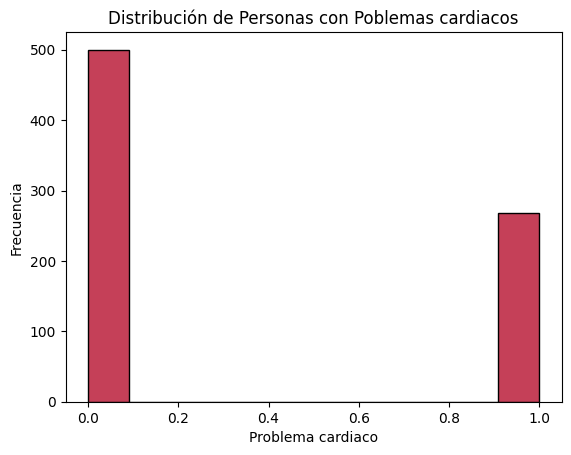

In [73]:
sns.histplot((df_procesado['Outcome']),color = '#B20020')
plt.title("Distribución de Personas con Poblemas cardiacos", fontsize=12)  
plt.xlabel("Problema cardiaco", fontsize=10)  
plt.ylabel("Frecuencia", fontsize=10) 
plt.show()

>**Observaciones**
>- Se puede observar que para nuestro target se tiene 2 valores sea 1 o 0, es decir binarios donde se cuenta mas valores en 0, en pocas palabras esta desbalanceada

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [75]:
from collections import Counter

print('Distribución original de clases:', Counter(y_train))
print('Distribución de clases después de SMOTE:', Counter(y_train_balanced))

Distribución original de clases: Counter({0.0: 400, 1.0: 214})
Distribución de clases después de SMOTE: Counter({0.0: 400, 1.0: 400})


>**Observaciones**
>- Es decir, el conjunto de datos estaba desbalanceado, con más ejemplos de la clase 0 que de la clase 1.
>- Ahora tanto la clase 1.0 como la clase 0.0 tienen 400 ejemplos cada una.

**`3.4. Modelo de Clasificación`**
En este caso debemos de utilizar dos modelos que es Logistic Regression y RandomForestClassifier para luego evaluar sus meétricas de desempeño.

*Modelo RandomForestClassifier*

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(random_state=42)

In [78]:
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [79]:
# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

>**Observaciones**
>- Se puede obsrevar que nuestro modelo ya esta entrenado y realizo predicciones

**3.5. Evaluación del Modelo**

*Evaluación del modelo RandomForestClassifier*

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

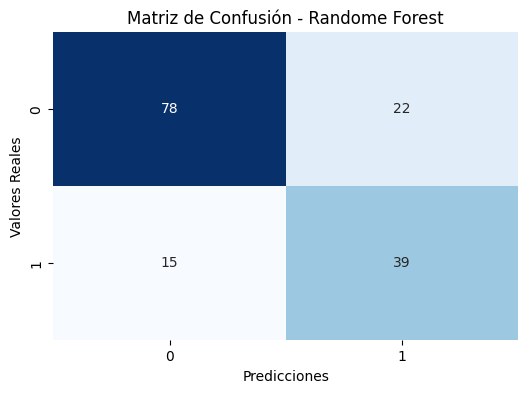

Evaluación de Random Forest:
Accuracy: 0.7597402597402597
Precision: 0.639344262295082
Recall: 0.7222222222222222
F1-score: 0.6782608695652174
Matriz de Confusión:
 [[78 22]
 [15 39]]


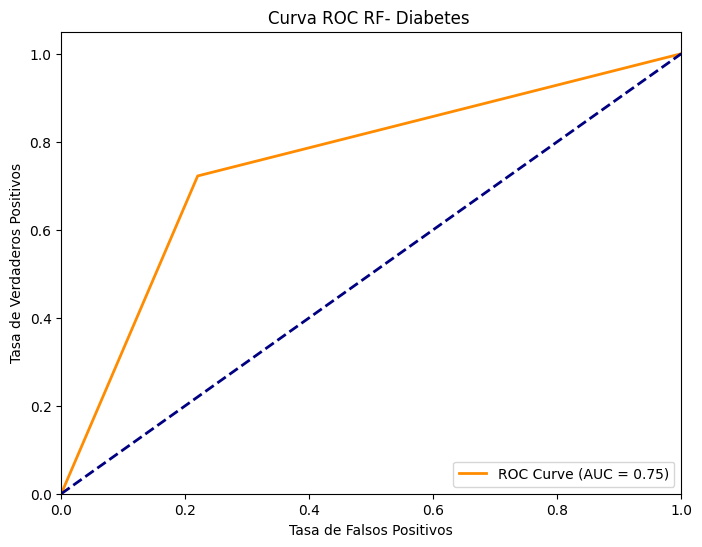

In [122]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

# Graficar la matriz de confusión para Randome Forest
plot_confusion_matrix(y_test, y_pred_rf, "Randome Forest")
print("Evaluación de Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, "Curva ROC RF- Diabetes ")

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
# Creando el modelo XGBoost
""""" 
# Con esta configuración no da mejores resultados que RF.
model = xgb.XGBClassifier(use_label_encoder=False,learning_rate=0.15 # Tasa de aprendizaje
                                                ,n_estimators=150 # El número de árboles
                                                ,max_depth=10 # Profundidad máxima
                                                ,min_samples_leaf=10 # Número mínimo de muestras por hoja
                                                ,subsample=0.8 # Frecuencia de submuestreo
                                                ,max_features=0.7 # Frecuencia de muestreo de características
                                                ,n_iter_no_change=20  # Parada temprana después de 20 iteraciones sin mejora
                                                ,random_state=42)
"""""
# Con esta configuración se mejora el rendimiento en todos los aspectos con relación RF
model = xgb.XGBClassifier(colsample_bytree=1
                         ,learning_rate=2.0
                         ,max_depth=10
                         ,n_estimators=100
                         ,subsample=0.8)
# Entrenando el modelo
model.fit(X_train_balanced, y_train_balanced)

# Haciendo predicciones
y_pred_xgboot = model.predict(X_test)

# Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred_xgboot)
print(f'Accuracy: {accuracy:.4f}')

# Imprimiendo el reporte de clasificación
print(classification_report(y_test, y_pred_xgboot))

# Evaluando el ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.7922
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       100
         1.0       0.69      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154

ROC-AUC: 0.8107


[[82 18]
 [14 40]]


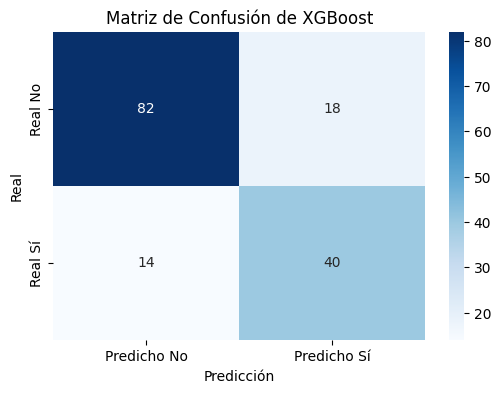

Evaluación de XGBoost:
Accuracy: 0.7922077922077922
Precision: 0.6896551724137931
Recall: 0.7407407407407407
F1-score: 0.7142857142857143


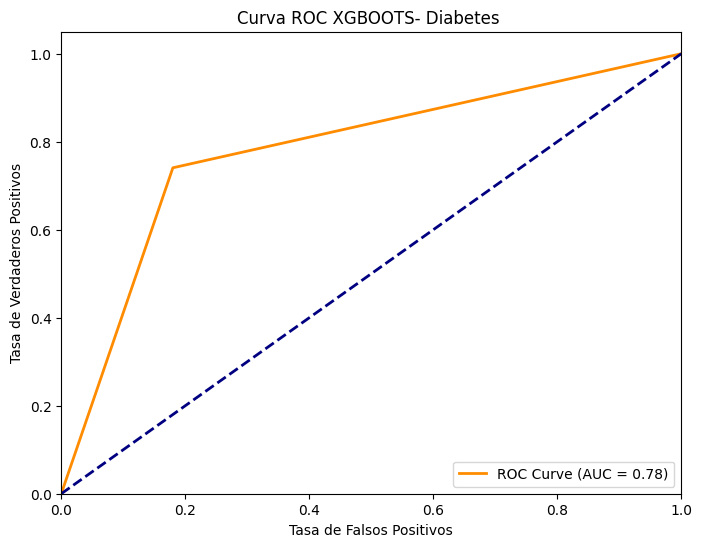

In [121]:
# Generando la matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgboot)


# Imprimiendo la matriz de confusión
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho No', 'Predicho Sí'], yticklabels=['Real No', 'Real Sí'])
plt.title('Matriz de Confusión de XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print("Evaluación de XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgboot))
print("Precision:", precision_score(y_test, y_pred_xgboot))
print("Recall:", recall_score(y_test, y_pred_xgboot))
print("F1-score:", f1_score(y_test, y_pred_xgboot))

fpr, tpr, _ = roc_curve(y_test, y_pred_xgboot)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, "Curva ROC XGBOOTS- Diabetes ")

# Comparaciones de los Modelos.


| Modelo/Métrica    | Accuracy     | Precision    | Recall       | F1-score     |
|-------------------|--------------|--------------|--------------|--------------|
| Random Forest     | 0.7597402597 | 0.6393442623 | 0.7222222222 | 0.6782608696 |
| XGBoost           | 0.7402597403 | 0.625        | 0.6481481481 | 0.6363636364 |
| XBoost Optimizado | 0.7922077922 | 0.6896551724 | 0.7407407407 | 0.7142857143 |



| Modelo/MC         | Falso Positivo | Falso Negativo | Verdadero Positivo | Verdadero Negativo |
|-------------------|----------------|----------------|--------------------|--------------------|
| Random Forest     | 22             | 15             | 39                 | 78                 |
| XBoost            | 21             | 19             | 35                 | 79                 |
| XBoost Optimizado | 18             | 14             | 40                 | 82                 |




El Randome Forest tuvo mejor resultado que el XGBoost no optimizado.
Se le aplico GridSearchCV, se obtuvieron los mejores hiperparámetros y el XGBoost Optimizado tuvo mejor rendimiento.

Es necesario revisar los datos pues tienen casos de No Diabetes con BMI y Glucosa muy elevados y con historial familiar y NO tienen diabetes. Esto es señal que el trabajo es inicial y sirve para pedir una revisión de los datos con los dueños de los datos.

Al principio no podía aceptar este resultado pues: 

XGBoost tiene la capacidad de optimizar específicamente el recall, mediante el uso de técnicas como la regularización y ajuste de hiperparámetros. En escenarios donde los falsos negativos son críticos, puedes ajustar el umbral de decisión del modelo para mejorar el recall.

No podía escribir ese parrafo y mis resultados no fueren acorde a la comparación.

Por eso me puse a revisar y ver como optimizar y me llevó mas tiempo.

Lo hice porque el profe dijo que a él le tomo 4 hs entonces me tranquilicé pues ya estaba por ser la hora.

# Codigo para Optimizar XGBoost

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:14:14] WARNING: D:\bld\xgboost-split_1730232592996\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       100
         1.0       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154

ROC-AUC: 0.8126


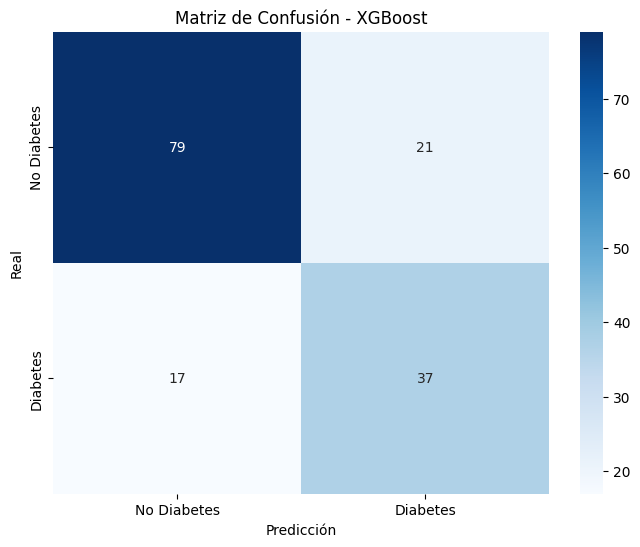

In [116]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el modelo base
model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

# Definimos los hiperparámetros a probar
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=3,  # Nivel de detalle durante la búsqueda
    n_jobs=-1  # Usa todos los procesadores disponibles
)

# Ajustamos el modelo con los datos balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

# Mejor conjunto de parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Mejor modelo ajustado
best_model = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_xgboost = best_model.predict(X_test)
y_proba_xgboost = best_model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_xgboost))

roc_auc = roc_auc_score(y_test, y_proba_xgboost)
print(f"ROC-AUC: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_xgboost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()
